<a href="https://colab.research.google.com/github/gabrielgranados97/IA_Tarea4/blob/main/Tarea4_Regresi%C3%B3ncuantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gabriel Fernando Granados Álvarez

**Tarea 4**

**Tópicos IA**

**Deep Quantile Regression**

In [ ]:
#Regresión cuantil
#tensorflow
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.backend as K

%matplotlib inline

In [ ]:
from google.colab import drive #correr solo en colab
drive.mount('/content/gdrive')
ruta='/content/gdrive/MyDrive/Colab Notebooks/mcycle.xlsx'
mcycle=pd.read_excel(ruta)
mcycle

Mounted at /content/gdrive


,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


In [ ]:
#Estandarización de los datos
mcycle.times = (mcycle.times - mcycle.times.mean())/mcycle.times.std()
mcycle.accel = (mcycle.accel - mcycle.accel.mean())/mcycle.accel.std()

In [ ]:
q

In [ ]:
#Red neuronal
model = Sequential()
#Capa 1
model.add(Dense(units=10, input_dim=1,activation='relu'))
#Capa 2
model.add(Dense(units=10, input_dim=1,activation='relu'))
#Salida
model.add(Dense(1))
#Compila - función de pérdida
model.compile(loss='mae', optimizer='adadelta')
model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
model.evaluate(mcycle.times.values, mcycle.accel.values)

5/5 [==============================] - 0s 3ms/step - loss: 0.9788


0.9788307547569275

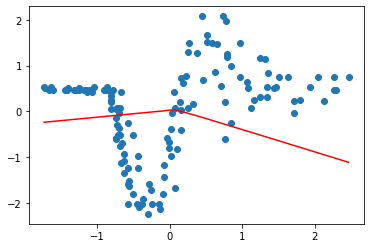

In [ ]:
t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
y_test = model.predict(t_test)

plt.scatter(mcycle.times,mcycle.accel)
plt.plot(t_test, y_test,'r')
plt.show()

In [ ]:

def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [ ]:

def mcycleModel():
    model = Sequential()
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(1))
    
    return model

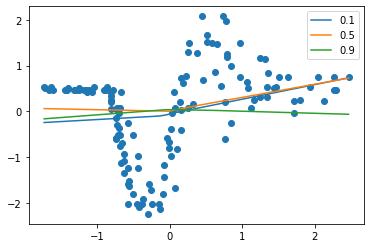

In [ ]:
qs = [0.1, 0.5, 0.9]

t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
plt.scatter(mcycle.times,mcycle.accel)

for q in qs:
    model = mcycleModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adadelta')
    model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
    
    # Predict the quantile
    y_test = model.predict(t_test)
    plt.plot(t_test, y_test, label=q) # plot out this quantile

plt.legend()    
plt.show()    